In [2]:
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt

import networkx as nx

import osmnx as ox

import contextily as ctx

from functools import reduce

In [3]:
#auto-delete all census columns w/'Error' in the title
race = gpd.read_file('midterm_data/BG_B03002_race.geojson')
nativity = gpd.read_file('midterm_data/BG_B05012_nativity.geojson')
mode = gpd.read_file('midterm_data/BG_B08301_mode.geojson')
pop_dens = pd.read_csv('midterm_data/pop_dens.csv')
census = [race, nativity, mode, pop_dens]

for df in census:
    df.drop(df.filter(regex='Error').columns, axis=1, inplace=True)

In [4]:
columnstokeep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']
race = race[columnstokeep]
race.columns = ['geoid',
 'name',
 'Total',
 'Not Latinx',
 'White',
 'Black',
 'American Indian/Alaska Native',
 'Asian',
 'Native Hawaiian/Other Pacific Islander',
 'Other',
 'Two or more races',
 'Latinx',
 'geometry']

In [5]:
race['Percent Not Latinx'] = race['Not Latinx']/race['Total']*100
race['Percent Latinx'] = race['Latinx']/race['Total']*100
race['Percent White'] = race['White']/race['Total']*100
race['Percent Black'] = race['Black']/race['Total']*100
race['Percent American Indian/Alaska Native'] = race['American Indian/Alaska Native']/race['Total']*100
race['Percent Asian'] = race['Asian']/race['Total']*100
race['Percent Native Hawaiian/Other Pacific Islander'] = race['Native Hawaiian/Other Pacific Islander']/race['Total']*100
race['Percent Other'] = race['Other']/race['Total']*100
race['Percent Two or more races'] = race['Two or more races']/race['Total']*100

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [6]:
columnstokeep = ['geoid',
 'B05012001',
 'B05012002',
 'B05012003']
nativity = nativity[columnstokeep]
nativity.columns=['geoid',
                 'Total',
                 'Native',
                 'Foreign-Born']
nativity['Percent Native'] = nativity['Native']/race['Total']*100
nativity['Percent Foreign-Born'] = nativity['Foreign-Born']/race['Total']*100

<ipython-input-6-828938b64346>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nativity['Percent Native'] = nativity['Native']/race['Total']*100


In [7]:
columnstokeep = ['geoid',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301005',
 'B08301006',
 'B08301007',
 'B08301008',
 'B08301009',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301015',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021']
mode = mode[columnstokeep]
mode.columns = ['geoid',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'In 2-person carpool',
 'In 3-person carpool',
 'In 4-person carpool',
 'In 5- or 6-person carpool',
 'In 7-or-more-person carpool',
 'Public transportation (excluding taxicab)',
 'Bus',
 'Subway or elevated rail',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley', 
 'Ferryboat',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home']
mode['Percent Driving'] = mode['Car, truck, or van']/mode['Total']*100
mode['Percent Public Transit'] = mode['Public transportation (excluding taxicab)']/mode['Total']*100
mode['Percent Biking'] = mode['Bicycle']/mode['Total']*100
mode['Percent Walking'] = mode['Walked']/mode['Total']*100

<ipython-input-7-b2879110c79c>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mode['Percent Driving'] = mode['Car, truck, or van']/mode['Total']*100


In [8]:
#merges all the census tables into a single dataframe and removes duplicate columns
census = [race, nativity, mode, pop_dens]
census_merged = reduce(lambda  left,right: pd.merge(left,right,on=['geoid'],
                                            how='outer', suffixes=('', '_y')), census)
census_merged.drop(census_merged.filter(regex='_y$'),axis=1, inplace=True)
census_merged = gpd.GeoDataFrame(census_merged, geometry='geometry')

In [9]:
pd.set_option('display.max_columns', 100)
census_merged.head()

,geoid,name,Total,Not Latinx,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other,Two or more races,Latinx,geometry,Percent Not Latinx,Percent Latinx,Percent White,Percent Black,Percent American Indian/Alaska Native,Percent Asian,Percent Native Hawaiian/Other Pacific Islander,Percent Other,Percent Two or more races,Native,Foreign-Born,Percent Native,Percent Foreign-Born,"Car, truck, or van",Drove alone,Carpooled,In 2-person carpool,In 3-person carpool,In 4-person carpool,In 5- or 6-person carpool,In 7-or-more-person carpool,Public transportation (excluding taxicab),Bus,Subway or elevated rail,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Ferryboat,Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,Percent Driving,Percent Public Transit,Percent Biking,Percent Walking,Total Population,Population Density,Area (land)
0,15000US060371011101,"Block Group 1, Los Angeles, CA",1688.0,1208.0,1068.0,8.0,0.0,44.0,0.0,0.0,88.0,480.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913...",71.563981,28.436019,63.270142,0.473934,0.000000,2.606635,0.000000,0.000000,5.213270,None,None,None,None,584.0,561.0,23.0,11.0,12.0,0.0,0.0,0.0,23.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,50.0,85.756241,3.377386,0.0,0.000000,1688,9773.780,0.172707
1,15000US060371011102,"Block Group 2, Los Angeles, CA",1614.0,1069.0,841.0,11.0,3.0,179.0,3.0,8.0,24.0,545.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",66.232962,33.767038,52.106568,0.681537,0.185874,11.090458,0.185874,0.495663,1.486989,None,None,None,None,762.0,663.0,99.0,69.0,30.0,0.0,0.0,0.0,36.0,26.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,95.250000,4.500000,0.0,0.000000,1614,11795.090,0.136837
2,15000US060371011103,"Block Group 3, Los Angeles, CA",981.0,818.0,707.0,0.0,0.0,108.0,0.0,0.0,3.0,163.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979...",83.384302,16.615698,72.069317,0.000000,0.000000,11.009174,0.000000,0.000000,0.305810,None,None,None,None,514.0,432.0,82.0,71.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,94.139194,0.000000,0.0,0.000000,981,7457.720,0.131542
3,15000US060371011221,"Block Group 1, Los Angeles, CA",2156.0,2044.0,1812.0,74.0,15.0,100.0,0.0,0.0,43.0,112.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",94.805195,5.194805,84.044527,3.432282,0.695733,4.638219,0.000000,0.000000,1.994434,None,None,None,None,1022.0,918.0,104.0,48.0,35.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,10.0,0.0,37.0,94.893222,0.000000,0.0,0.928505,2156,3511.879,0.613916
4,15000US060371011222,"Block Group 2, Los Angeles, CA",1249.0,1214.0,1070.0,0.0,0.0,120.0,0.0,0.0,24.0,35.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906...",97.197758,2.802242,85.668535,0.000000,0.000000,9.607686,0.000000,0.000000,1.921537,None,None,None,None,708.0,699.0,9.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,93.527081,1.188904,0.0,0.000000,1249,3069.140,0.406954


In [9]:
#this is just testing out the isochrone function to make sure it works with the new census data format
ATL_BRT = gpd.read_file('midterm_data/MARTA_BRT_routes_stops.geojson')
ATL_BRT = ATL_BRT.mask(ATL_BRT.eq('None')).dropna()
stops = [ATL_BRT]
#create 'x' and 'y' columns from geometry if they don't exist
for gdf in stops:
    if not ('lon' in gdf.columns and 'lat' in gdf.columns):
        gdf['lon'] = gdf['geometry'].x
        gdf['lat'] = gdf['geometry'].y
output = gpd.GeoDataFrame()

In [12]:
#set variables at the top so they can be easily changed as needed
network_type = 'walk'
trip_times = [10]
meters_per_minute = 75
#define the function
def isogen(gdf):
    global isochrones
    #pull relevant OSMnx data based on place variable
    G = ox.graph.graph_from_point(place, dist=1000, dist_type='bbox', network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
    G = ox.project_graph(G, to_crs='epsg:3857')
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    #caculates center node
    minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
    centroid_x = (maxx-minx)/2 + minx
    centroid_y = (maxy-miny)/2 + miny
    center_node = ox.get_nearest_node(G, 
                                  (centroid_y,centroid_x), 
                                  method = 'euclidean')
    gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

    iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                    cmap='viridis', 
                                    start=0, 
                                    return_hex=True)

    trip_times.sort(reverse=True)
    time_color = list(zip(trip_times, iso_colors))
    time_color
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    #gdf_edges.plot(figsize=(10,10))
    
    for time, color in list(time_color):
        subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')  
        for node in subgraph.nodes():
            gdf_nodes.loc[node,'time'] = str(time) + ' mins'
            gdf_nodes.loc[node,'color'] = color
    gdf_nodes['color'].fillna('#cccccc', inplace=True)
    #create new gdf containing calculated isochrones
    isochrones = gdf_nodes.dissolve('time')
    isochrones = isochrones.convex_hull.reset_index()
    isochrones.columns=['time','geometry']

In [13]:
#run the function on the BRT gdf (to keep things simple, I'm using only the 10 minute walkshed)
output = gpd.GeoDataFrame()
for index,row in ATL_BRT.iterrows():
    place = row[7], row[6] #gotta make sure this cycles through
    isogen(ATL_BRT)
    output = isochrones.append(output, ignore_index=True)

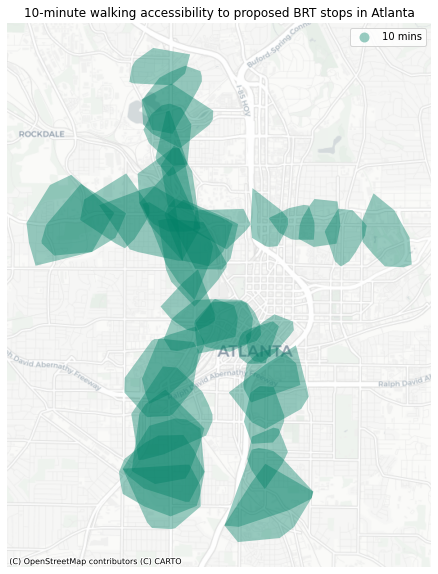

In [14]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add isochrones
output.plot(alpha=.4,
               ax=ax,
               column='time',
               cmap='summer',
               legend=True,
               zorder=20)
# no axis
ax.axis('off')

# title
ax.set_title('10-minute walking accessibility to proposed BRT stops in Atlanta')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [20]:
output = output.to_crs(3857)
#census_merged was previously in EPSG:4326
census_merged = census_merged.to_crs(3857)
#spatial join to find tracts within walkshed service area
tracts_served = gpd.sjoin(census_merged, output, op='intersects')
tracts_served_2 = gpd.sjoin(output, census_merged, op='intersects')

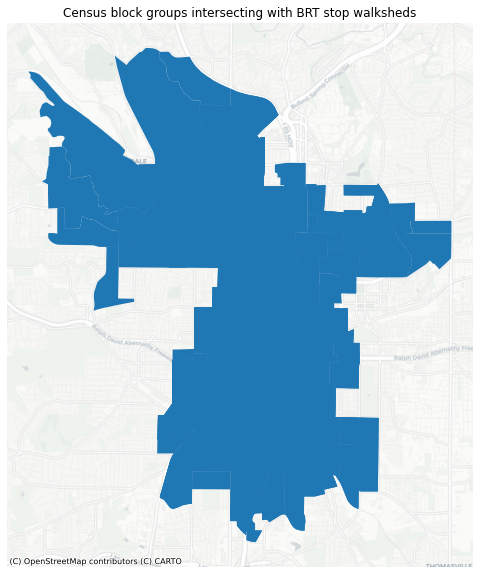

In [18]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add isochrones
tracts_served.plot(ax=ax,
               legend=True,
               zorder=20)

# no axis
ax.axis('off')

# title
ax.set_title('Census block groups intersecting with BRT stop walksheds')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [29]:
tracts_served.shape

(245, 55)

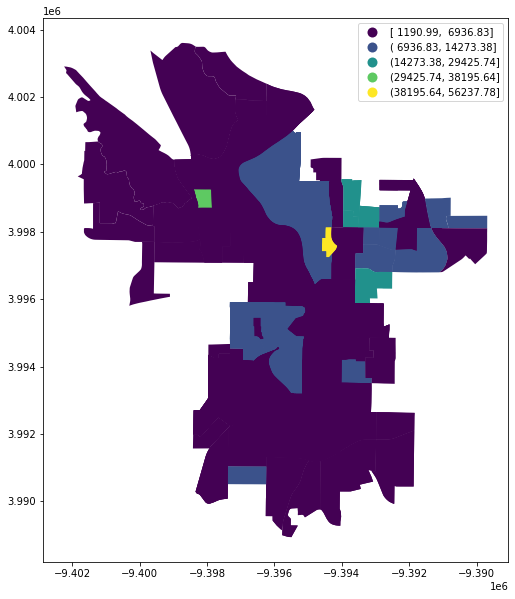

In [33]:
ax = tracts_served.plot(tracts_served['Population Density'],
        figsize=(10,10),
        scheme='natural_breaks',
        legend=True)